In [1]:
from matplotlib import cm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
digits = datasets.load_digits()  # 手写数字数据集
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)  # 多分类问题

In [3]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9381084840055632

In [4]:
y_predict = log_reg.predict(X_test)
y_predict

array([8, 1, 3, ..., 1, 0, 3])

In [5]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average="micro")  # 多分类问题的(微)查准率P

0.9381084840055632

In [6]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict, average='macro')  # 多分类问题的(宏)召回率R

0.9382566121383997

In [7]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict, average='micro')  # 多分类问题的F1

0.9381084840055631

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)  # 多分类问题的混淆矩阵

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 122,   2,   1,   0,   0,   1,   4,   1,  12],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   2, 139,   0,   4,   0,   1,   2,   1],
       [  1,   3,   0,   0, 141,   0,   1,   3,   0,   1],
       [  1,   4,   1,   0,   0, 144,   1,   0,   0,   1],
       [  1,   2,   0,   0,   0,   1, 132,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   3,   2,   4,   4,   0,   1, 116,   2],
       [  0,   0,   0,   7,   0,   1,   0,   1,   0, 138]], dtype=int64)

C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


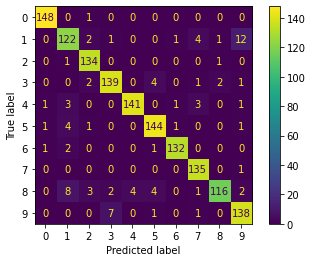

In [9]:
# sklearn包实现
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg, X_test, y_test)

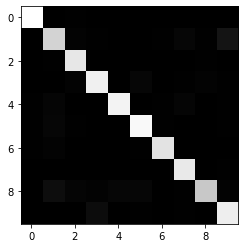

In [10]:
# 手工绘制实现
cfm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots()
ax.imshow(cfm, cmap=cm.gray)
plt.show()

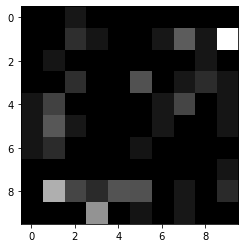

In [11]:
row_sums = np.sum(cfm, axis=1)  # 行和
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)  # 使对角线元素为0

# 越亮的区域,代表预测错误较多
plt.imshow(err_matrix, cmap=cm.gray)  # 可以看出很多1被错误地预测为9,很多8被错误地预测为1
plt.show()